In [1]:
#Barcha kutubxonalarni chaqirib olamiz
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Dataset ni ham yuklab olamiz
df = pd.read_csv("https://raw.githubusercontent.com/hikmatilloahatov/Uybor-visualization/main/uybor.csv")
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [4]:
df.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


In [5]:
#Tumanlarni chiqarib olaman
df['district'].unique()

array(['Yunusobod', 'Yakkasaroy', 'Chilonzor', 'Uchtepa', 'Mirzo Ulugbek',
       'Yashnobod', 'Mirobod', 'Shayhontohur', 'Olmzor', 'Sergeli',
       'Yangihayot', 'Bektemir'], dtype=object)

In [6]:
#Olmzor emas, Olmazor bo'lish kerak
df.replace(to_replace='Olmzor',
           value='Olmazor',
           inplace=True)

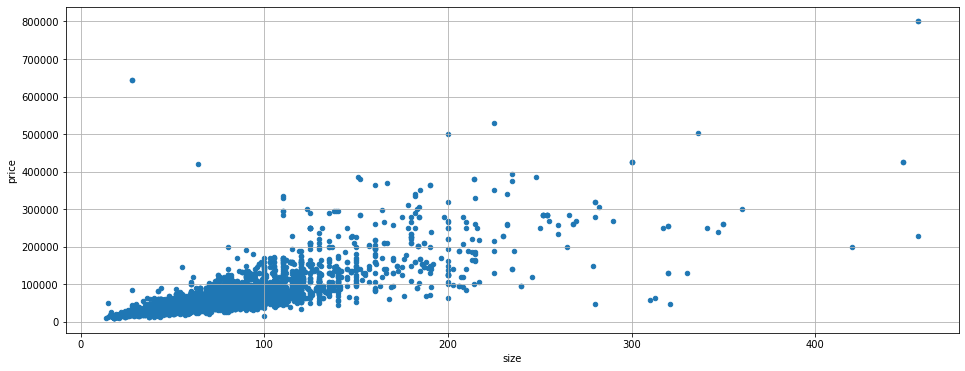

In [7]:
#Visualization
df.plot(kind='scatter', x='size', y='price', figsize=(16, 6))
plt.grid()
plt.show()

#**Ko'rinadiki uylarning ko'p qismi $100K va 100 kv.m gacha uylar ekan**

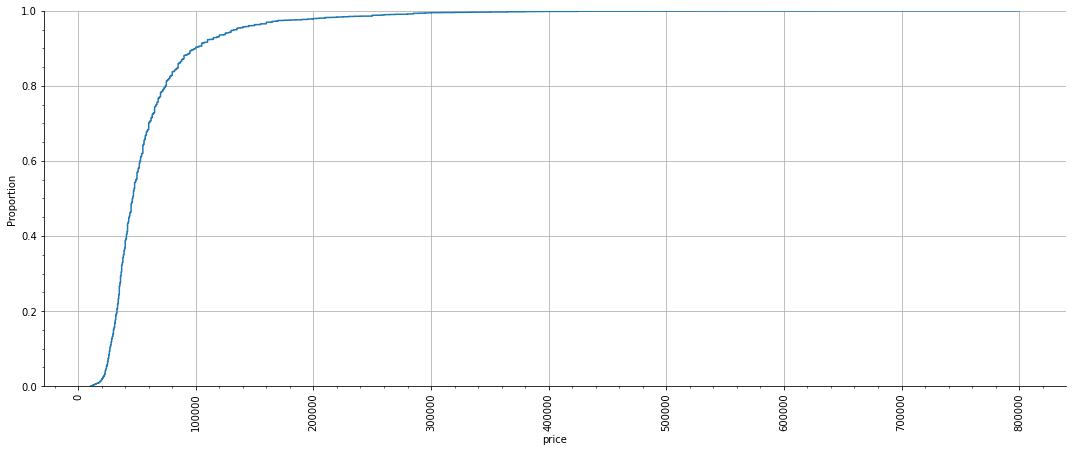

In [8]:
#Visualisation  
sns.displot(data=df, x='price', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='major')
plt.minorticks_on()
plt.show()

## **Bu yerda narxi $100K gacha bo'lgan uylar datasetni 90% ini tashkil qilar ekan.**

In [9]:
#Xonalarning dataset uzunligiga nisbati 
for i in df['rooms'].unique():
  print(f"{i} xonali ~ {np.around(df[df['rooms'] == i].shape[0]/df.shape[0]*100)}%")

3 xonali ~ 31.0%
2 xonali ~ 36.0%
1 xonali ~ 13.0%
4 xonali ~ 15.0%
5 xonali ~ 3.0%
8 xonali ~ 0.0%
6 xonali ~ 1.0%
7 xonali ~ 0.0%
10 xonali ~ 0.0%


# **Ko'rinadiki 2 va 3 xonali uylarga talab ancha yuqoriroq**

In [10]:
#Korrelatsiya
df.corr()

,rooms,size,level,max_levels,price,lat,lng
rooms,1.000000,0.787697,0.139826,0.184896,0.552582,0.015092,0.013279
size,0.787697,1.000000,0.160907,0.276208,0.781830,0.030097,0.066416
level,0.139826,0.160907,1.000000,0.593245,0.059276,-0.027811,0.045332
max_levels,0.184896,0.276208,0.593245,1.000000,0.219737,-0.064064,0.039507
price,0.552582,0.781830,0.059276,0.219737,1.000000,0.015636,0.070309
lat,0.015092,0.030097,-0.027811,-0.064064,0.015636,1.000000,0.528706
lng,0.013279,0.066416,0.045332,0.039507,0.070309,0.528706,1.000000


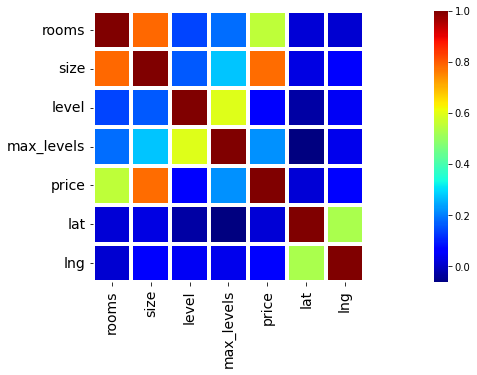

In [11]:
#Visualization | Korrelatsiya uchun
plt.figure(figsize=(25, 5))
sns.heatmap(data=df.corr(), linewidth=3, cmap="jet", square=True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## **Uyning Narxi uning hajmi va xonalariga bog'liqligi ancha yuqori ekan**

In [12]:
#E'lonlar soni tumanlar bo'yicha
df1 = pd.DataFrame(df['district'].value_counts())
df1

,district
Chilonzor,1629
Mirzo Ulugbek,1360
Yunusobod,873
Uchtepa,870
Mirobod,767
Yakkasaroy,647
Yashnobod,459
Shayhontohur,371
Olmazor,264
Sergeli,159


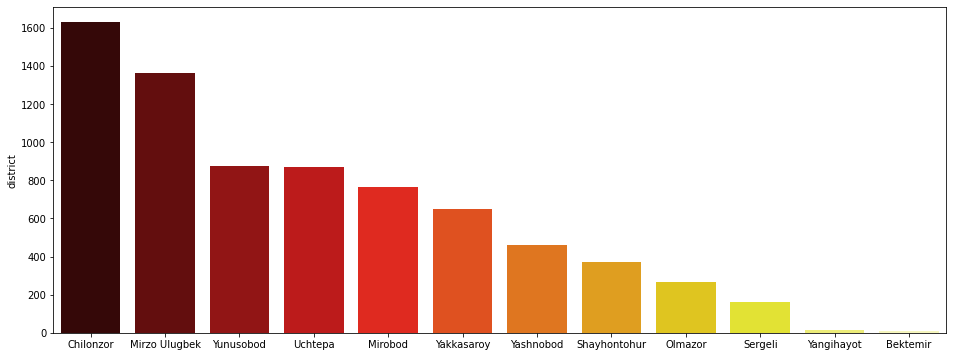

In [13]:
#Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['district'], palette='hot')
plt.show()

## **Eng ko'p e'lonlar Chilonzor va Mirzo Ulug'bek hududlariga to'g'ri kelar ekan**